In [16]:
import numpy as np
from matplotlib import pyplot as plt

In [17]:
# Интервал для решения
a = 0
b = 1

# Начальные условия для ДУ
u0     = 1
u0Diff = 1

# Правая часть ДУ(Как аргрументы передаем x,u,w в таком же порядке)
def function(*arguments):
    return -arguments[2]*np.cos(arguments[0])  - arguments[1]*np.sin(arguments[0]) + arguments[0]*np.sin(arguments[0])


# Оригинальное решение из задания
def originalSolution(x):
    return x + np.cos(x)

In [18]:
# метод Эйлера - 4 порядка (аргументы u0, w0=u0' в том же порядке)
def EulerMethod(xGrid, function, *arguments):
    h = xGrid[1] - xGrid[0]
    
    u_0 = arguments[0]
    w_0 = arguments[1]
    
    uPlot = [u_0]
    wPlot = [w_0]
    
    for i in range(len(xGrid) - 1):
        w = wPlot[i] + h * function(xGrid[i], uPlot[i], wPlot[i])
        u = uPlot[i] + h * wPlot[i]
        
        wPlot.append(w)
        uPlot.append(u)
    
    return uPlot

In [19]:
# метод Рунге-Кутта - 4 порядка (аргументы u0, w0=u0' в том же порядке)
def RungeKuttaMethod(xGrid, function, *arguments):
    h = xGrid[1] - xGrid[0]
    
    u0 = arguments[0]
    w0 = arguments[1]
    
    uPlot = [u0]
    wPlot = [w0]
    
    for i in range(len(xGrid) - 1):
        k1_w = function(xGrid[i], uPlot[i], wPlot[i])
        k1_u = wPlot[i]
        
        k2_w = function(xGrid[i] + h / 2, uPlot[i] + h / 2 * k1_u, wPlot[i] + h / 2 * k1_w)
        k2_u = wPlot[i] + h / 2 * k1_w
        
        k3_w = function(xGrid[i] + h / 2, uPlot[i] + h / 2 * k2_u, wPlot[i] + h / 2 * k2_w)
        k3_u = wPlot[i] + h /2 * k2_w
        
        k4_w = function(xGrid[i] + h, uPlot[i] + h * k3_u, wPlot[i] + h * k3_w)
        k4_u = wPlot[i] + h * k3_w
        
        w = wPlot[i] + h / 6 * (k1_w + 2 * (k2_w + k3_w) + k4_w)
        u = uPlot[i] + h / 6 * (k1_u + 2 * (k2_u + k3_u) + k4_u)
        
        wPlot.append(w)
        uPlot.append(u)
    
    return uPlot

In [20]:
# Метод Адамса - 3 порядка (аргументы u0, w0=u0' в том же порядке)
def AdamsMethod(xGrid, function, *arguments):
    h = xGrid[1] - xGrid[0]
    
    u0 = arguments[0]
    w0 = arguments[1]
 
    uPlot = [u0]
    wPlot = [w0]
   
    for i in range(2):
        k1_w = function(xGrid[i], uPlot[i], wPlot[i])
        k1_u = wPlot[i]

        k2_w = function(xGrid[i] + h / 2, uPlot[i] + h / 2 * k1_u, wPlot[i] + h / 2 * k1_w)
        k2_u = wPlot[i] + h / 2 * k1_w

        k3_w = function(xGrid[i] + h / 2, uPlot[i] + h / 2 * k2_u, wPlot[i] + h / 2 * k2_w)
        k3_u = wPlot[i] + h /2 * k2_w

        k4_w = function(xGrid[i] + h, uPlot[i] + h * k3_u, wPlot[i] + h * k3_w)
        k4_u = wPlot[i] + h * k3_w

        w = wPlot[i] + h / 6 * (k1_w + 2 * (k2_w + k3_w) + k4_w)
        u = uPlot[i] + h / 6 * (k1_u + 2 * (k2_u + k3_u) + k4_u)

        wPlot.append(w)
        uPlot.append(u)
        
    for i in range(len(xGrid) - 3):
        w = (wPlot[i + 2] + h * ( 23 / 12 * function(xGrid[i + 2], uPlot[i + 2], wPlot[i + 2]) - 
                                   4  / 3  * function(xGrid[i + 1], uPlot[i + 1], wPlot[i + 1]) + 
                                   5  / 12 * function(xGrid[i],     uPlot[i],     wPlot[i])))
        u =  uPlot[i + 2] + h * ( 23 / 12 * wPlot[i + 2] - 4 / 3 * wPlot[i + 1] + 5 / 12 * wPlot[i])
        
        wPlot.append(w)
        uPlot.append(u)
        
    return uPlot

In [21]:
# Делаем сетку с шагом 0.05
h = 0.05
xGrid = np.linspace(a, b, round((b - a) / h) + 1)

In [22]:
# Считаем точные значения в узлах сетки
uPlot = [originalSolution(x) for x in xGrid]

In [23]:
# Строим решения на основе нашей сетки и трех методов
EulerPlot = EulerMethod(xGrid, function, u0, u0Diff)
RKPlot    = RungeKuttaMethod(xGrid, function, u0, u0Diff)
AdamsPlot = AdamsMethod(xGrid, function, u0, u0Diff)

In [24]:
# Считаем ошибки поточечно для каждого метода
EulerErrors = [abs(eulerValue - originalFunctionValue)  for eulerValue, originalFunctionValue  in zip(EulerPlot, uPlot)]
RKErrors    = [abs(RKvalue - originalFunctionValue) for RKvalue, originalFunctionValue in zip(RKPlot, uPlot)]
AdamsErrors = [abs(adamsValue - originalFunctionValue)  for adamsValue, originalFunctionValue  in zip(AdamsPlot, uPlot)]



Зеленый: Оригинал
Черный: Эйлер
Красный: РунгеКутт
Голубой: Адамс


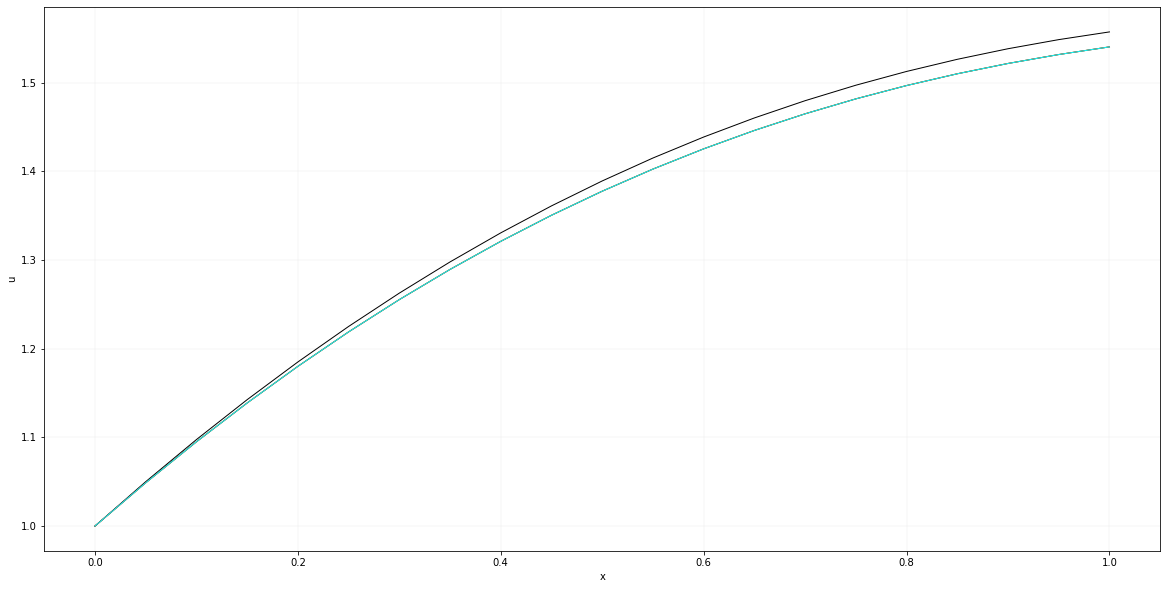

In [25]:
# Рисуем Оригинальное решение и примерные решения методами
ax = plt.subplots(figsize=(20, 10))[1]

ax.plot(xGrid, uPlot, color="green", linewidth=1.0)
ax.plot(xGrid, EulerPlot, color="black", linewidth=1.0)
ax.plot(xGrid, RKPlot, color="red", linewidth=1.0)
ax.plot(xGrid, AdamsPlot, color="cyan", linewidth=1.0)

ax.grid(which="major", linewidth=0.1)

ax.set_xlabel("x")        
ax.set_ylabel("u")

print("\n")
print("Зеленый: Оригинал")
print("Черный: Эйлер")
print("Красный: РунгеКутт")
print("Голубой: Адамс")

plt.show()

In [26]:
# Выводим ошибки для каждого из методов для конкретных х
print("0 - X, 1 - Эйлер, 2 - РК, 3 - Адамс")
for i in range(len(xGrid)):
    print("\n")
    print(xGrid[i], "|", EulerErrors[i], "|", RKErrors[i], "|", AdamsErrors[i])

0 - X, 1 - Эйлер, 2 - РК, 3 - Адамс


0.0 | 0.0 | 0.0 | 0.0


0.05 | 0.0012497396050337173 | 1.0219192159155455e-09 | 1.0219192159155455e-09


0.1 | 0.0024958347219743438 | 1.9680501672780792e-09 | 1.9680501672780792e-09


0.15000000000000002 | 0.0037319422723431916 | 2.8352491465710727e-09 | 2.3390245522669773e-06


0.2 | 0.00495159336489448 | 3.6205940467937126e-09 | 4.64878549188974e-06


0.25 | 0.006148218414673057 | 4.321438318299897e-09 | 6.923692813520788e-06


0.30000000000000004 | 0.00731517339256027 | 4.935461372923555e-09 | 9.15095041342795e-06


0.35000000000000003 | 0.008445766979373603 | 5.460711216542791e-09 | 1.1317702132584984e-05


0.4 | 0.009533288397762796 | 5.8956448611979795e-09 | 1.3411385233697004e-05


0.45 | 0.01057103569639084 | 6.2391607436040886e-09 | 1.5419375866132512e-05


0.5 | 0.011552344263832337 | 6.490626702770896e-09 | 1.7329122625309168e-05


0.55 | 0.012470615353943115 | 6.649902628552695e-09 | 1.9128188181616324e-05


0.6000000000000001 | 0.0133



Голубой: Ошибки Эйлера
Синий: Ошибки RK
Красный: Ошибка Адамса


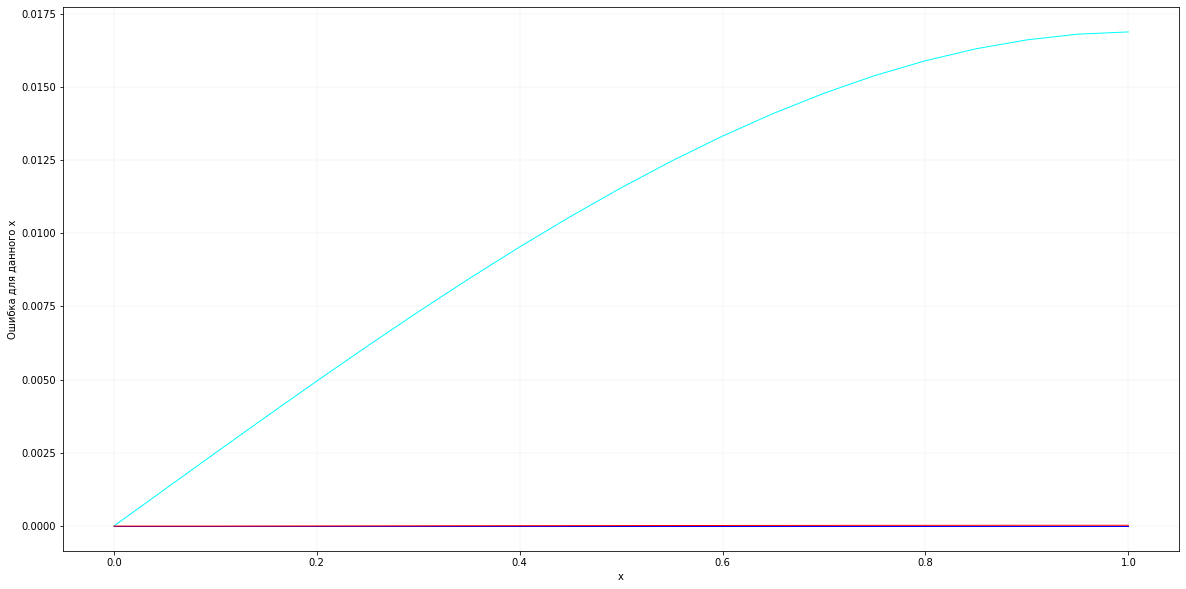

In [27]:
# Рисуем ошибки для конкретного x, по оси x отложена координата а по оси y отложена ошибка
# в этой точке
ax = plt.subplots(figsize=(20, 10))[1]

ax.plot(xGrid, EulerErrors, color="cyan", linewidth=1.0)
ax.plot(xGrid, RKErrors, color="blue", linewidth=1.0)
ax.plot(xGrid, AdamsErrors, color="red", linewidth=1.0)

ax.set_xlabel("x")        
ax.set_ylabel("Ошибка для данного x")

ax.grid(which="major", linewidth=0.1)

print("\n")
print("Голубой: Ошибки Эйлера")
print("Синий: Ошибки RK")
print("Красный: Ошибка Адамса")

plt.show()

In [28]:
# Поправка Рунге
def Runge_rule(uPlotForH0, uPlotForH1, powerOfRungeKutta):
    corrections = []
    
    for i in range(len(uPlotForH0)):
        element = (uPlotForH1[2 * i] - uPlotForH0[i]) / (np.power(2, powerOfRungeKutta) - 1)
        corrections.append(element)
        
    return corrections

In [29]:
# Шаг сетки
h = 0.1

In [30]:
# Построение сетки c шагом h2
xGridRarely = np.linspace(a, b, round((b - a) / h) + 1)

# Построение сетки с промежуточными точками(тоесть с шагом h2/2)
xGridOften = []
for i in range(len(xGridRarely) - 1):
    xGridOften.append(xGridRarely[i])
    xGridOften.append((xGridRarely[i] + xGridRarely[i + 1]) / 2)
xGridOften.append(xGridRarely[-1])

In [31]:
# Точные значения для сетки с шагом h2
uPlot = [originalSolution(x) for x in xGridRarely]

In [32]:
# Функция на сетке с шагом h2
RKPlotRarely = RungeKuttaMethod(xGridRarely, function, u0, u0Diff)

# Функция на сетке с шагом h2/2
RKPlotOften = RungeKuttaMethod(xGridOften, function, u0, u0Diff)

In [33]:
# Порядок РунгиКутта
powerOfRungeKutt = 4

# Считаем поправки для двух построенных функций
runge_range = Runge_rule(RKPlotRarely, RKPlotOften, powerOfRungeKutt)

In [34]:
# Создали новую функцию на сетке h2, но с поправкой
RKPlotImprovment = []

for i in range(len(runge_range)):
    n = 2 * i
    RKPlotImprovment.append(RKPlotOften[n] + runge_range[i])


# Считаем ошибки функций без поправки, и с поправкой
RKErrors = [abs(rkValue - originalValue)  for rkValue, originalValue  in zip(RKPlotRarely, uPlot)]
RKErrorsImprovement = [abs(rkValueImpr - originalValue) for rkValueImpr, originalValue in zip(RKPlotImprovment, uPlot)]

    
print("\n")
print("Ошибки для конкретной точки, для разбиения с шагом h = 0.1, для РК без поправки и с поправкой")

# Выводим ошибки для каждого из методов
print("0 - X, 1 - Без поправки, 2 - РК, 3 - С поправкой")
for i in range(len(xGridRarely)):
    print("\n")
    print(xGridRarely[i], "|", RKErrors[i], "|", RKErrorsImprovement[i])



Ошибки для конкретной точки, для разбиения с шагом h = 0.1, для РК без поправки и с поправкой
0 - X, 1 - Без поправки, 2 - РК, 3 - С поправкой


0.0 | 0.0 | 0.0


0.1 | 3.063477049813912e-08 | 5.69355673718519e-11


0.2 | 5.605882491543923e-08 | 1.247120184899586e-10


0.30000000000000004 | 7.588298722716047e-08 | 2.0562640479226957e-10


0.4 | 8.981446963929329e-08 | 3.010565130523446e-10


0.5 | 9.767780806413384e-08 | 4.11481293483007e-10


0.6000000000000001 | 9.942962142517331e-08 | 5.365394795120437e-10


0.7000000000000001 | 9.516714971624651e-08 | 6.751292858098168e-10


0.8 | 8.513077465188701e-08 | 8.255374162047247e-10


0.9 | 6.970093346936324e-08 | 9.855947169512547e-10


1.0 | 4.9389997425208776e-08 | 1.1528489274326148e-09


In [37]:
# Пробегаемся по различным шагам чтобы посчитать максимальные ошибки ДО и ПОСЛЕ поправок
hPlot = []
errorsPlotWithoutImarovement = []
errorsPlotWithImarovement = []

for n in np.arange(2, 101, step = 10):    
    # Обычная сетка
    xGridRarely, h = np.linspace(a, b, n, retstep=True)
    
    # Строим другую сетку с вдвое меньшим разбиением
    xGridOften = []
    for i in range(len(xGridRarely) - 1):
        xGridOften.append(xGridRarely[i])
        xGridOften.append((xGridRarely[i] + xGridRarely[i + 1]) / 2)
    xGridOften.append(xGridRarely[-1])
    
    
    # Cчитаем РунгиКуттом для обычного разиения, вдвое меньшего, и для меньшего считаем настоящие значения
    RKPlot0 = RungeKuttaMethod(xGridRarely, function, u0, u0Diff)
    RKPlot1 = RungeKuttaMethod(xGridOften, function, u0, u0Diff)
    uPlot = [originalSolution(x) for x in xGridRarely]
    
    #Считаем поправки для двух функций
    runge_range = Runge_rule(RKPlot0, RKPlot1, powerOfRungeKutt)
    
    # Создаем новую функцию на основе поправок, на сетке h2
    RKPlotImprovement = []
    for i in range(len(runge_range)):
        n = 2 * i
        RKPlotImprovement.append(RKPlot1[n] + runge_range[i])
    
    # Считаем максимальную ошибку для разбиения на h2 с поправкой и БЕЗ
    maxErrorWithoutImarovement = max([abs(rkValue - originalValue) for rkValue, originalValue in zip(RKPlot0, uPlot)])
    maxErrorWithImarovement = max([abs(rkImprValue - originalValue) for rkImprValue, originalValue in zip(RKPlotImprovement, uPlot)])
    
    # Массив шагов
    hPlot.append(h)
    
    # Массив максимальных ошибок для метода без поправок
    errorsPlotWithoutImarovement.append(maxErrorWithoutImarovement)
    
    # Массив максимальных ошибок для метода с поправкой
    errorsPlotWithImarovement.append(maxErrorWithImarovement)

In [38]:
print("\n")
print("Ошибки для методов С поправкой и БЕЗ в зависимости от шага")

# Выводим ошибки
print("0 - Шаг, 1 - Без поправки, 2 - РК, 3 - С поправкой")
for i in range(len(hPlot)):
    print("\n")
    print(hPlot[i], "|", errorsPlotWithoutImarovement[i], "|", errorsPlotWithImarovement[i])    



Ошибки для методов С поправкой и БЕЗ в зависимости от шага
0 - Шаг, 1 - Без поправки, 2 - РК, 3 - С поправкой


1.0 | 0.0009538606389565274 | 2.115516126788286e-05


0.09090909090909091 | 6.862511248151293e-08 | 7.191638395909195e-10


0.047619047619047616 | 5.548952630718418e-09 | 2.8969271426149135e-11


0.03225806451612903 | 1.1971745816907742e-09 | 4.163114297739412e-12


0.024390243902439025 | 3.9638670124020337e-10 | 1.0325074129013956e-12


0.0196078431372549 | 1.6684431614066852e-10 | 3.47499806707674e-13


0.01639344262295082 | 8.195666367782906e-11 | 1.41886502547095e-13


0.014084507042253521 | 4.482192395016682e-11 | 6.705747068735946e-14


0.012345679012345678 | 2.6536550734590492e-11 | 3.4861002973229915e-14


0.01098901098901099 | 1.669486771049833e-11 | 1.9539925233402755e-14




Голубой: RK без поправки
Оранжевый: RK с поправки


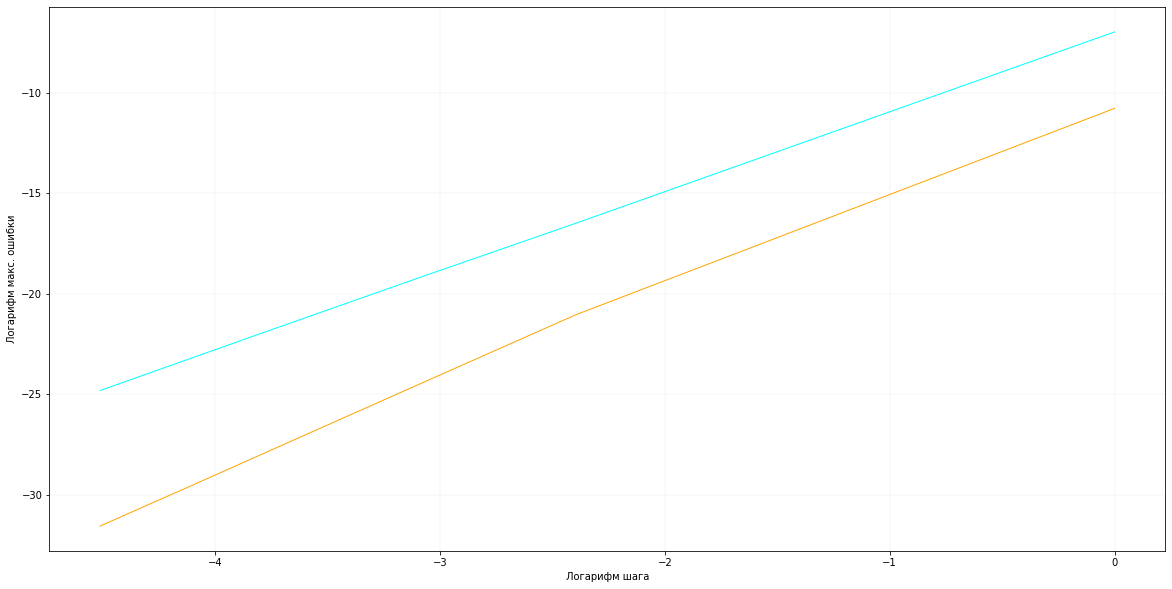

In [43]:
# Берем логарифмы шагов и ошибок для двух функций
ln_hPlot = np.log(hPlot)
ln_errorsPlotWithoutImarovement = np.log(errorsPlotWithoutImarovement)
ln_errorsPlotWithImarovement = np.log(errorsPlotWithImarovement)

# Рисуем график максимальной ошибки от шага
ax = plt.subplots(figsize=(20, 10))[1]
ax.plot(ln_hPlot, ln_errorsPlotWithoutImarovement, color="cyan", linewidth=1.0)
ax.plot(ln_hPlot, ln_errorsPlotWithImarovement, color="orange", linewidth=1.0)

ax.grid(which="major", linewidth=0.1)

ax.set_xlabel("Логарифм шага")        
ax.set_ylabel("Логарифм макс. ошибки")

print("\n")
print("Голубой: RK без поправки")
print("Оранжевый: RK с поправки")

plt.show()

In [54]:
coeff1 = 0
coeff2 = 0

for index in range(len(ln_hPlot)):
    coeff1 += ln_hPlot[index] * ln_errorsPlotWithoutImarovement[index]
coeff1 *= len(ln_hPlot)    
coeff1 -= (np.sum(ln_hPlot) * np.sum(ln_errorsPlotWithoutImarovement))
coeff1 /= (len(ln_hPlot) * np.sum(np.power(ln_hPlot, 2)) - np.power(np.sum(ln_hPlot), 2))


for index in range(len(ln_hPlot)):
    coeff2 += ln_hPlot[index] * ln_errorsPlotWithImarovement[index]
coeff2 *= len(ln_hPlot)    
coeff2 -= (np.sum(ln_hPlot) * np.sum(ln_errorsPlotWithImarovement))
coeff2 /= (len(ln_hPlot) * np.sum(np.power(ln_hPlot, 2)) - np.power(np.sum(ln_hPlot), 2))


print("Первый коэфф. наклона без поправок = ", coeffs[0])
print("Второй коэфф. наклона с поправками = ", coeffs[1])

Первый коэфф. наклона без поправок =  3.9555837823298057
Второй коэфф. наклона с поправками =  4.640810868752758
